<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11470 entries, 0 to 11469
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0       marketplace    11470 non-null  object
 1   customer_id        11470 non-null  int64 
 2   review_id          11470 non-null  object
 3   product_id         11470 non-null  object
 4   product_parent     11470 non-null  int64 
 5   product_title      11470 non-null  object
 6   product_category   11470 non-null  object
 7   star_rating        11470 non-null  int64 
 8   helpful_votes      11470 non-null  int64 
 9   total_votes        11470 non-null  int64 
 10  vine               11470 non-null  object
 11  verified_purchase  11470 non-null  object
 12  review_headline    11468 non-null  object
 13  review_body        11470 non-null  object
 14  review_date        11470 non-null  object
dtypes: int64(5), object(10)
memory usage: 1.3+ MB
None
        customer_id  product_parent 

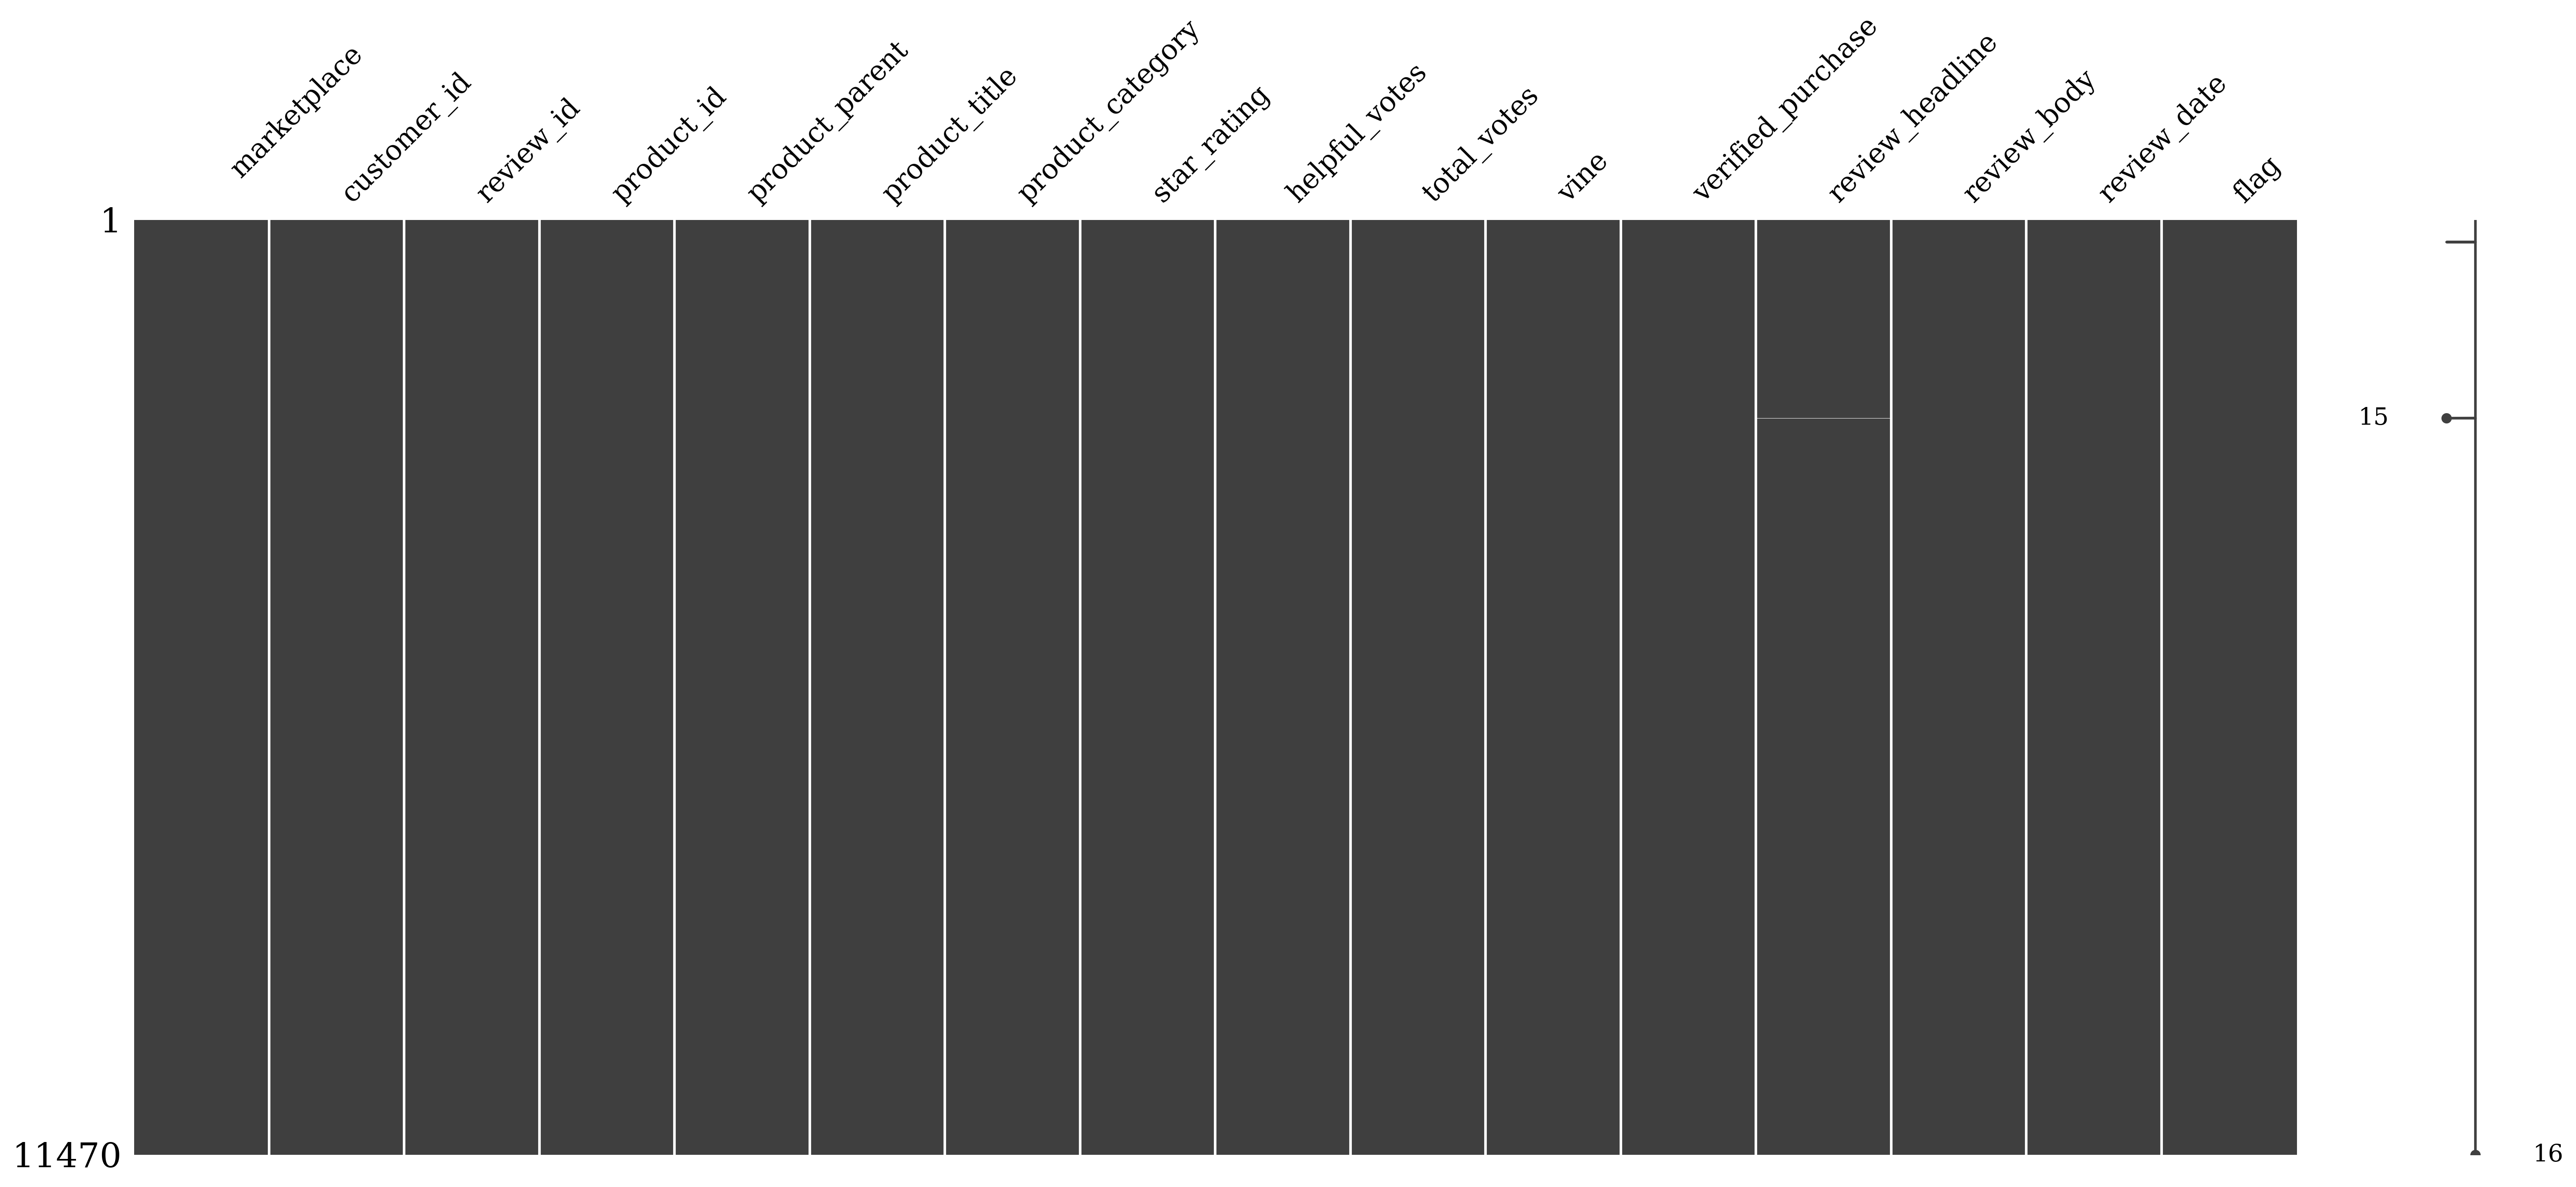

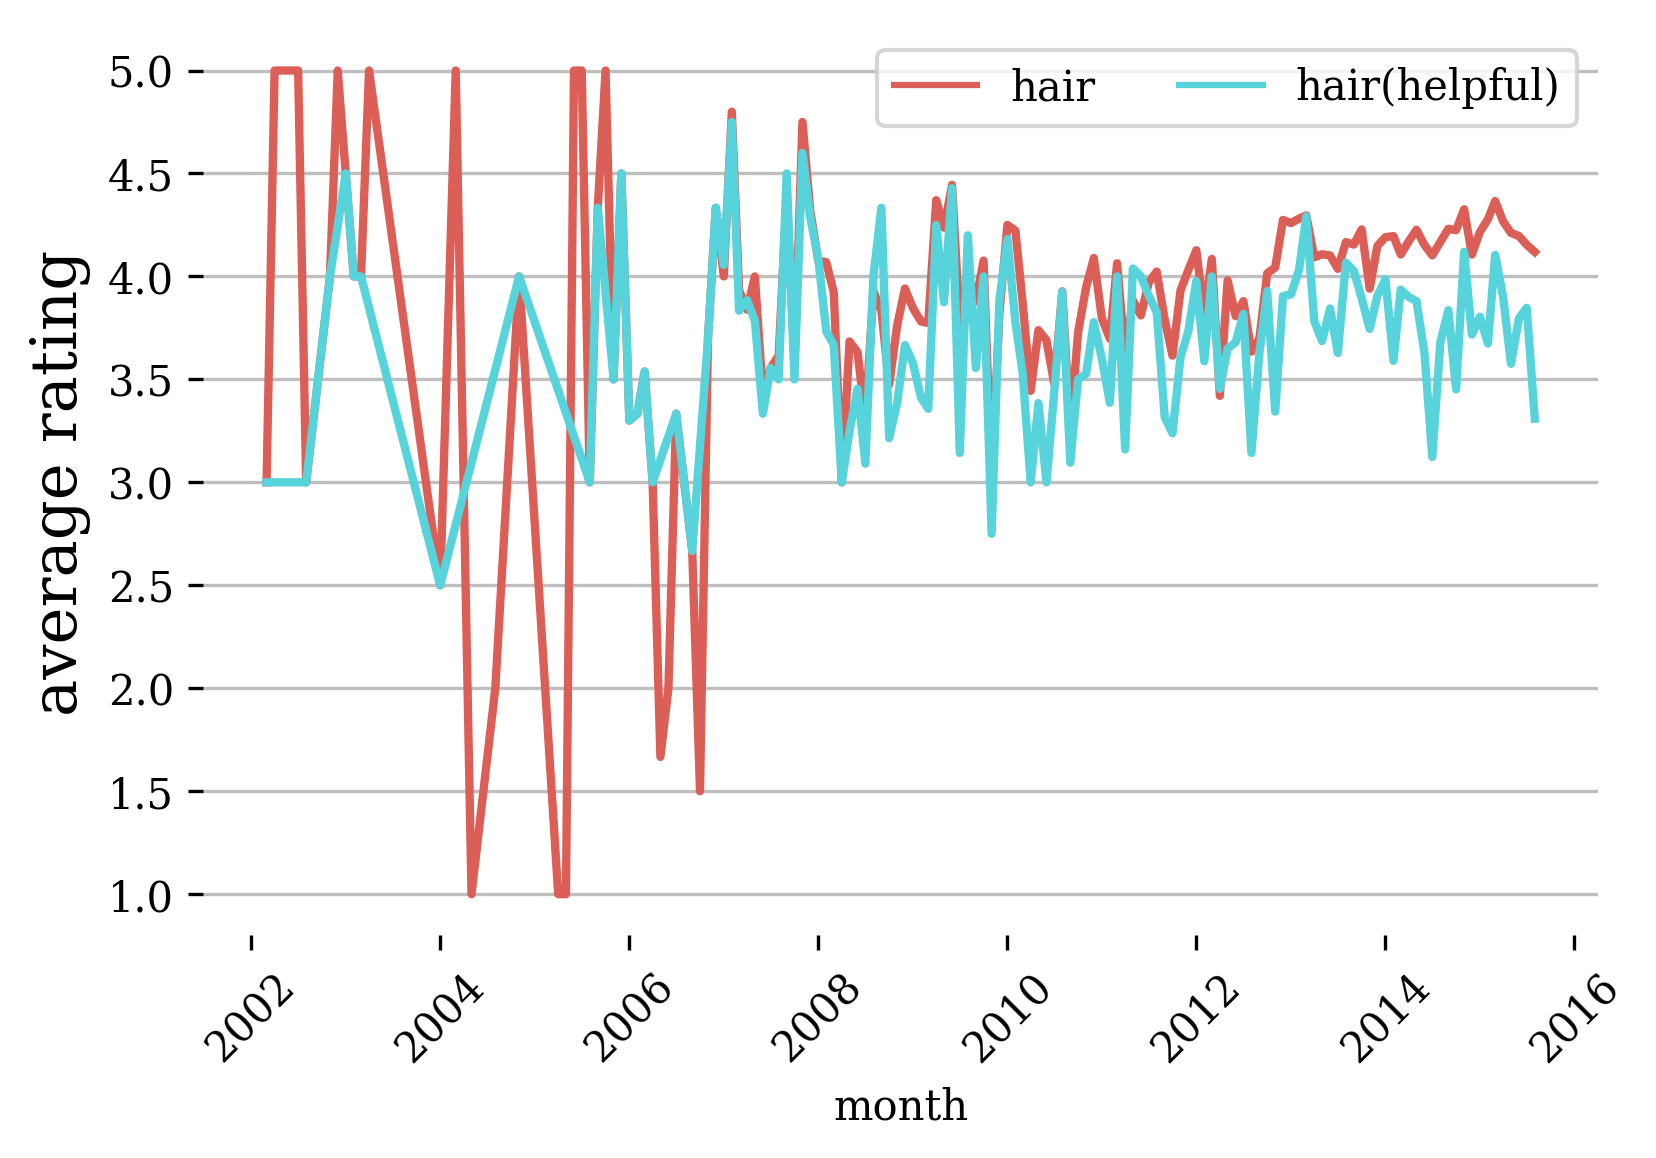

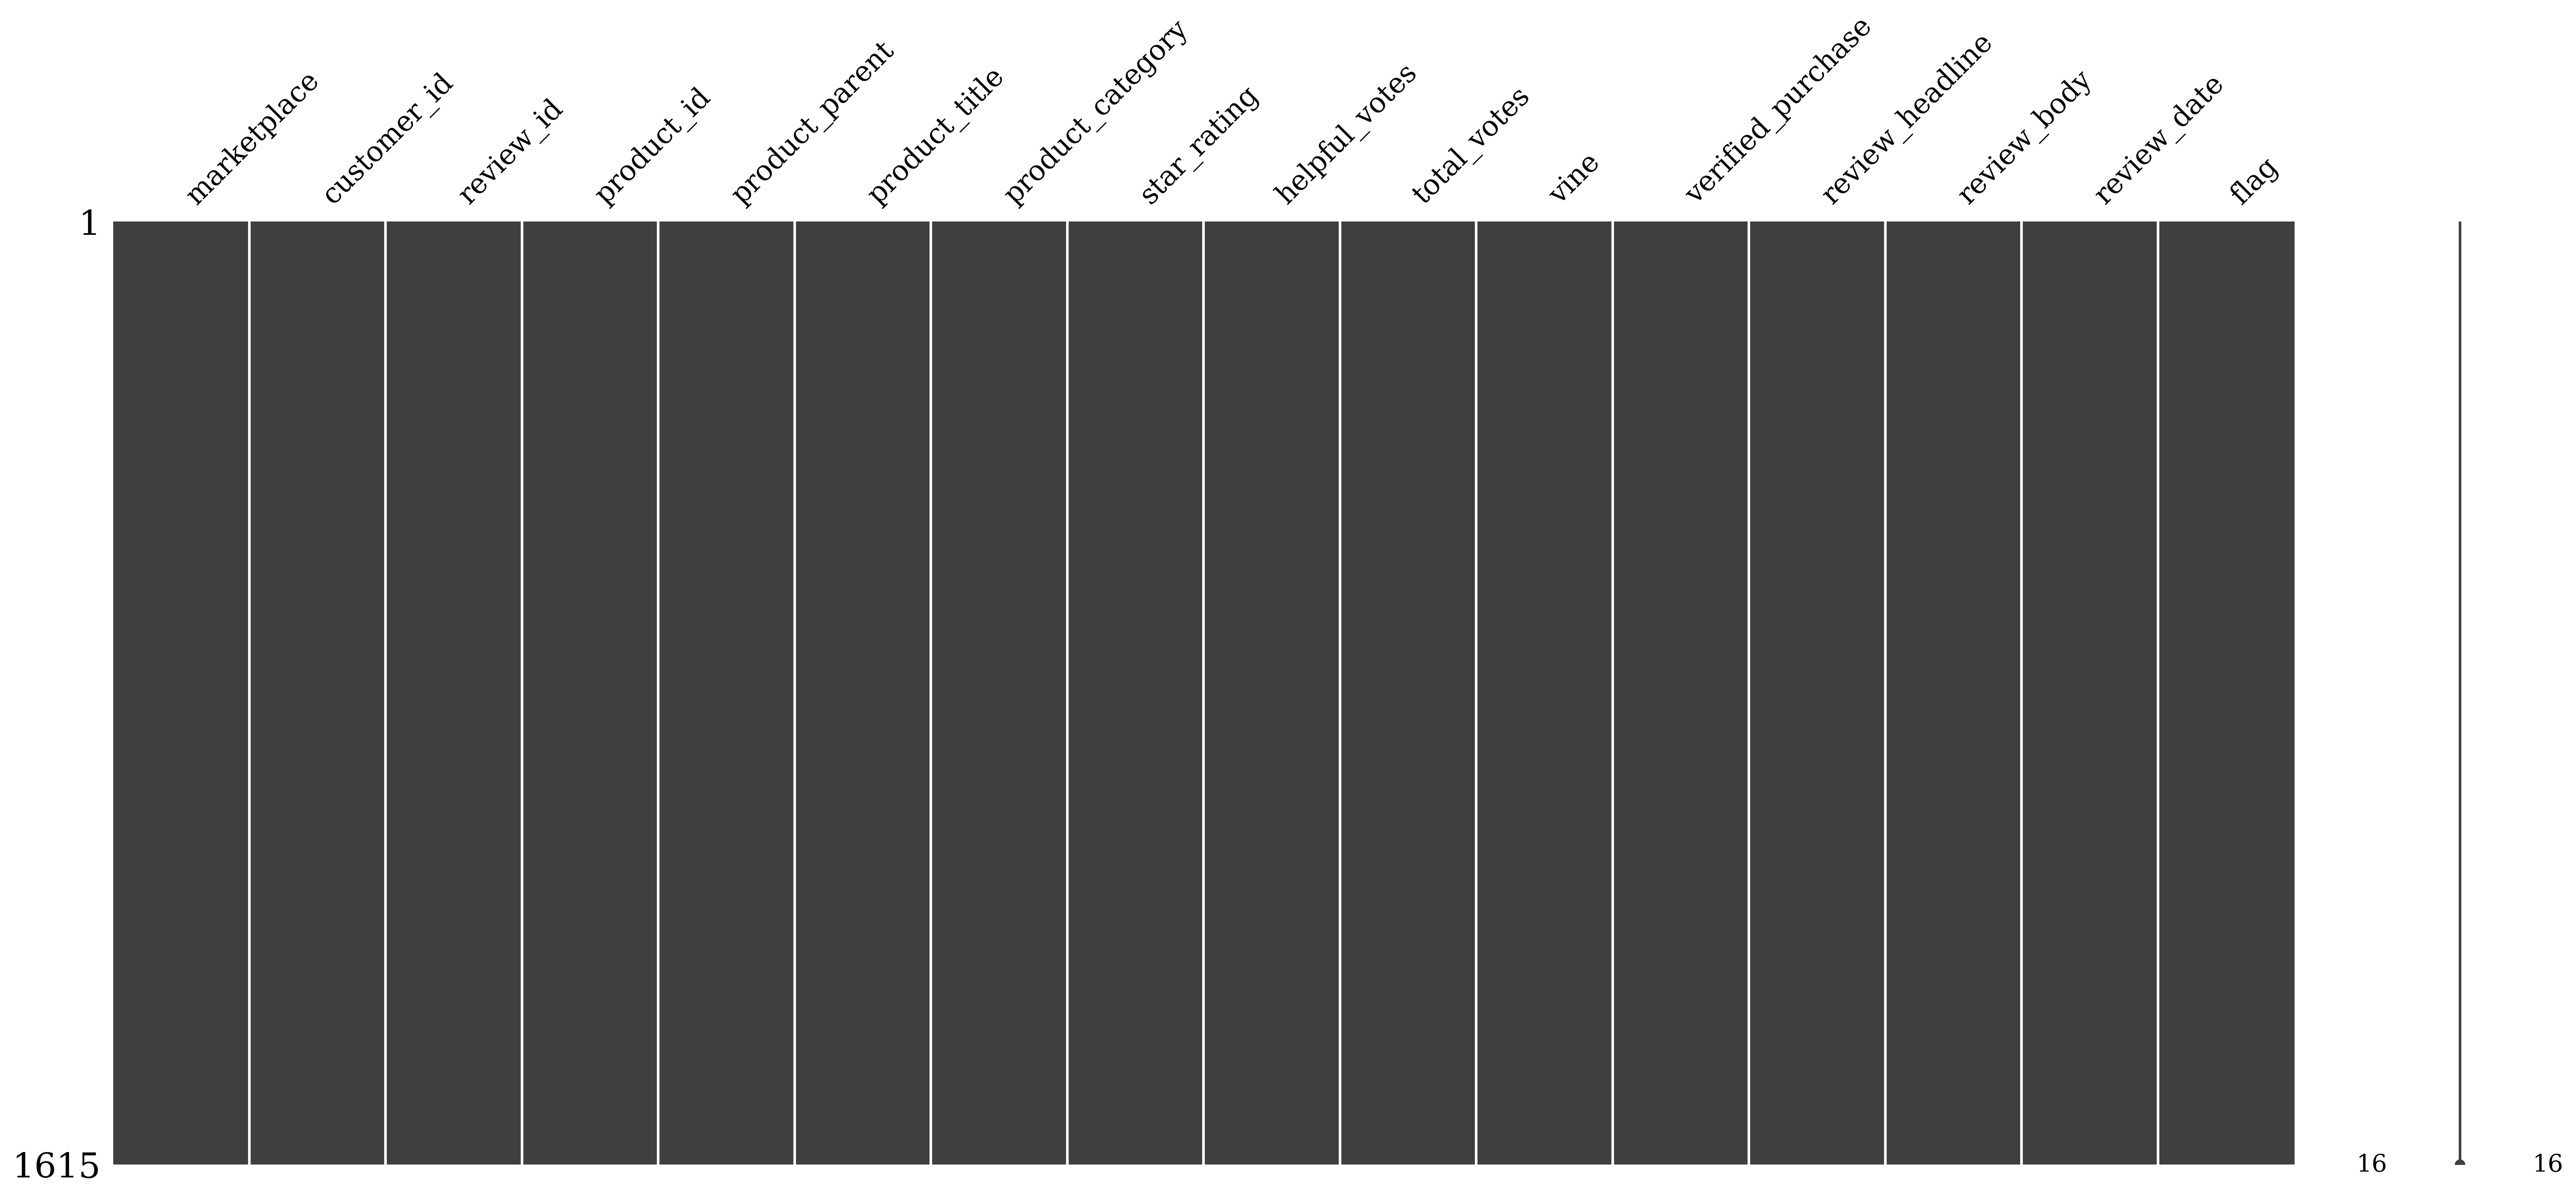

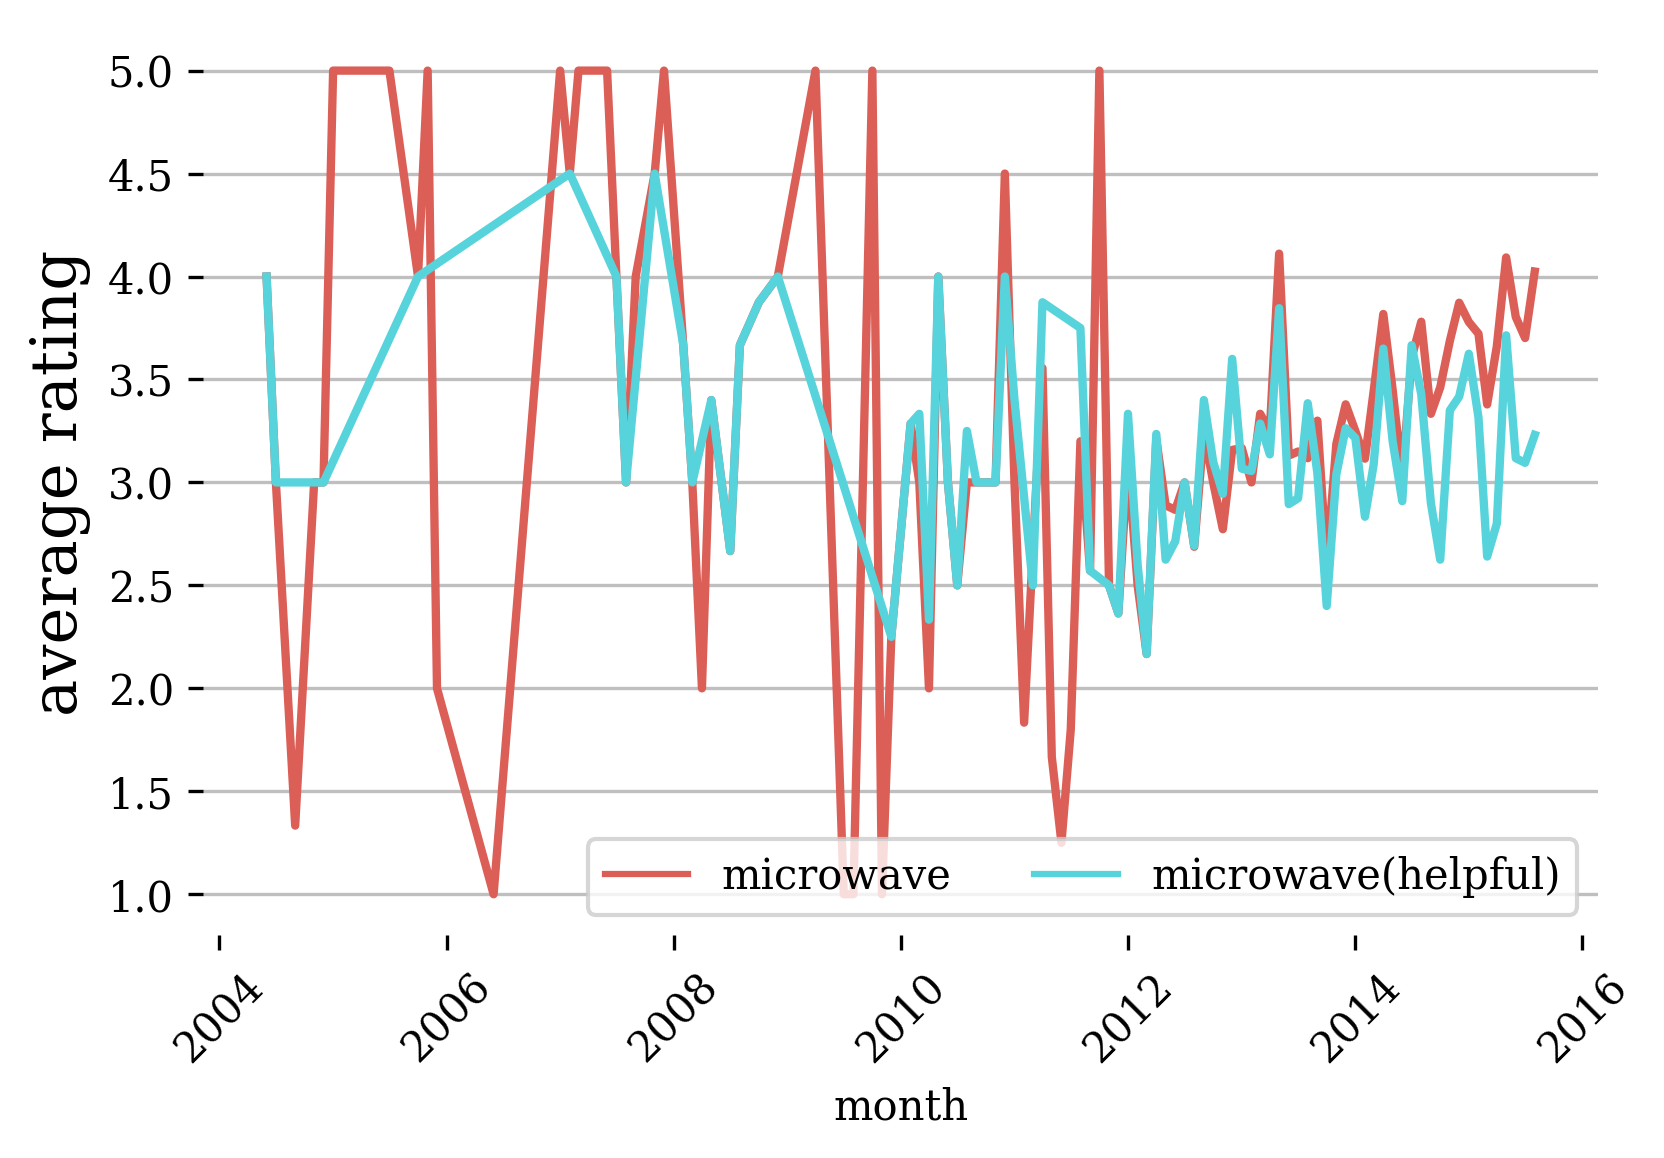

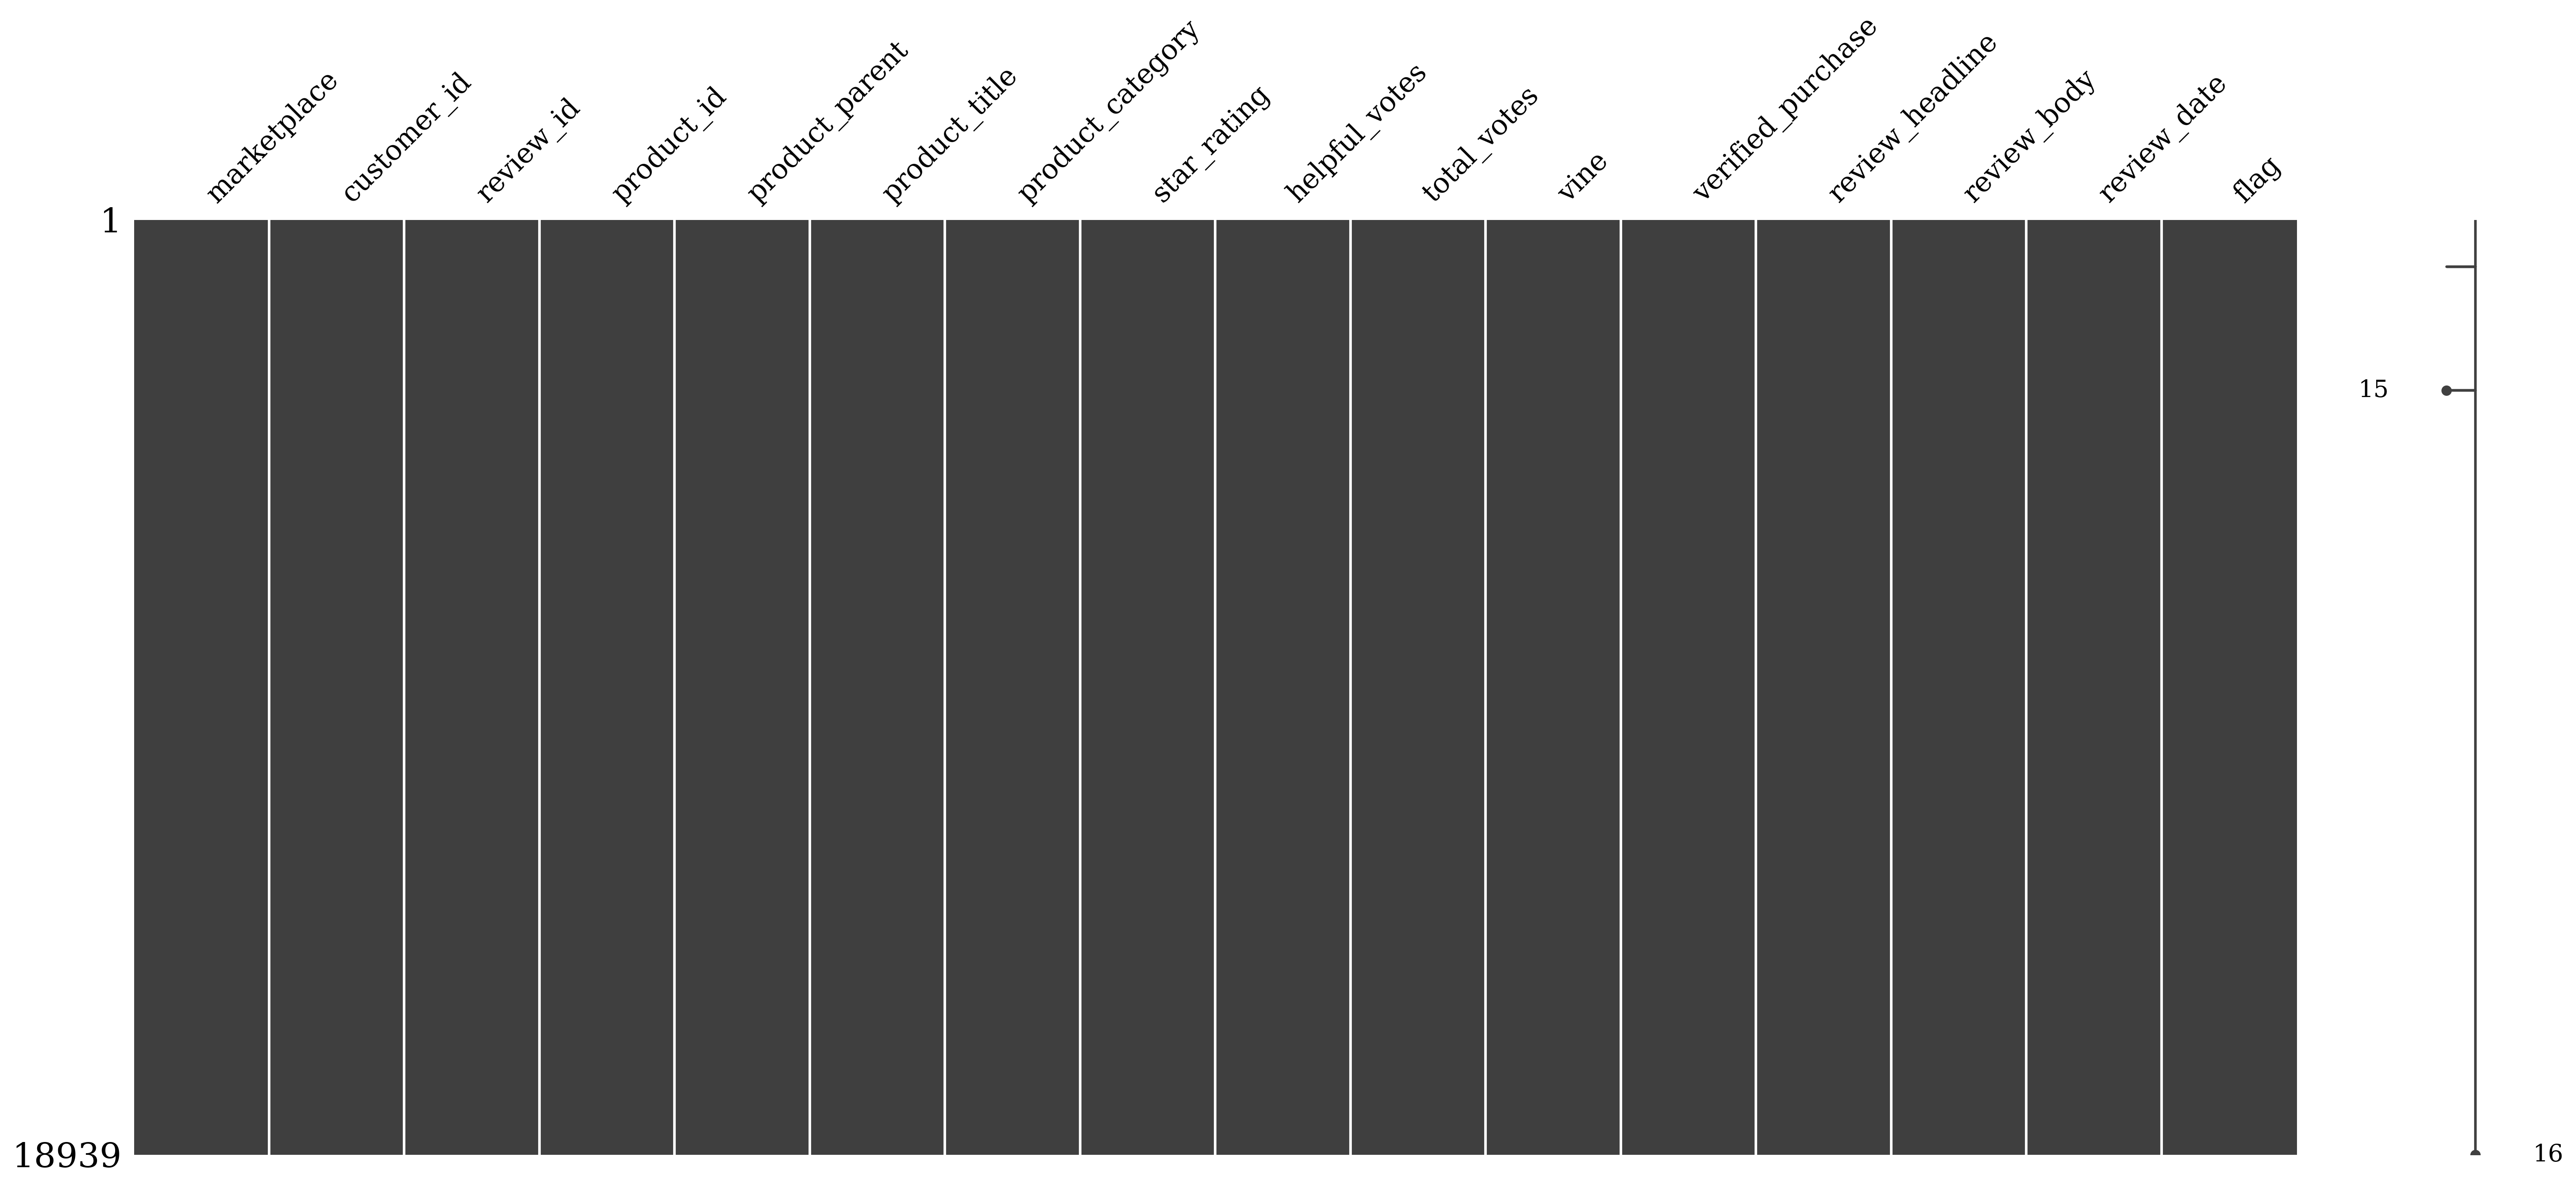

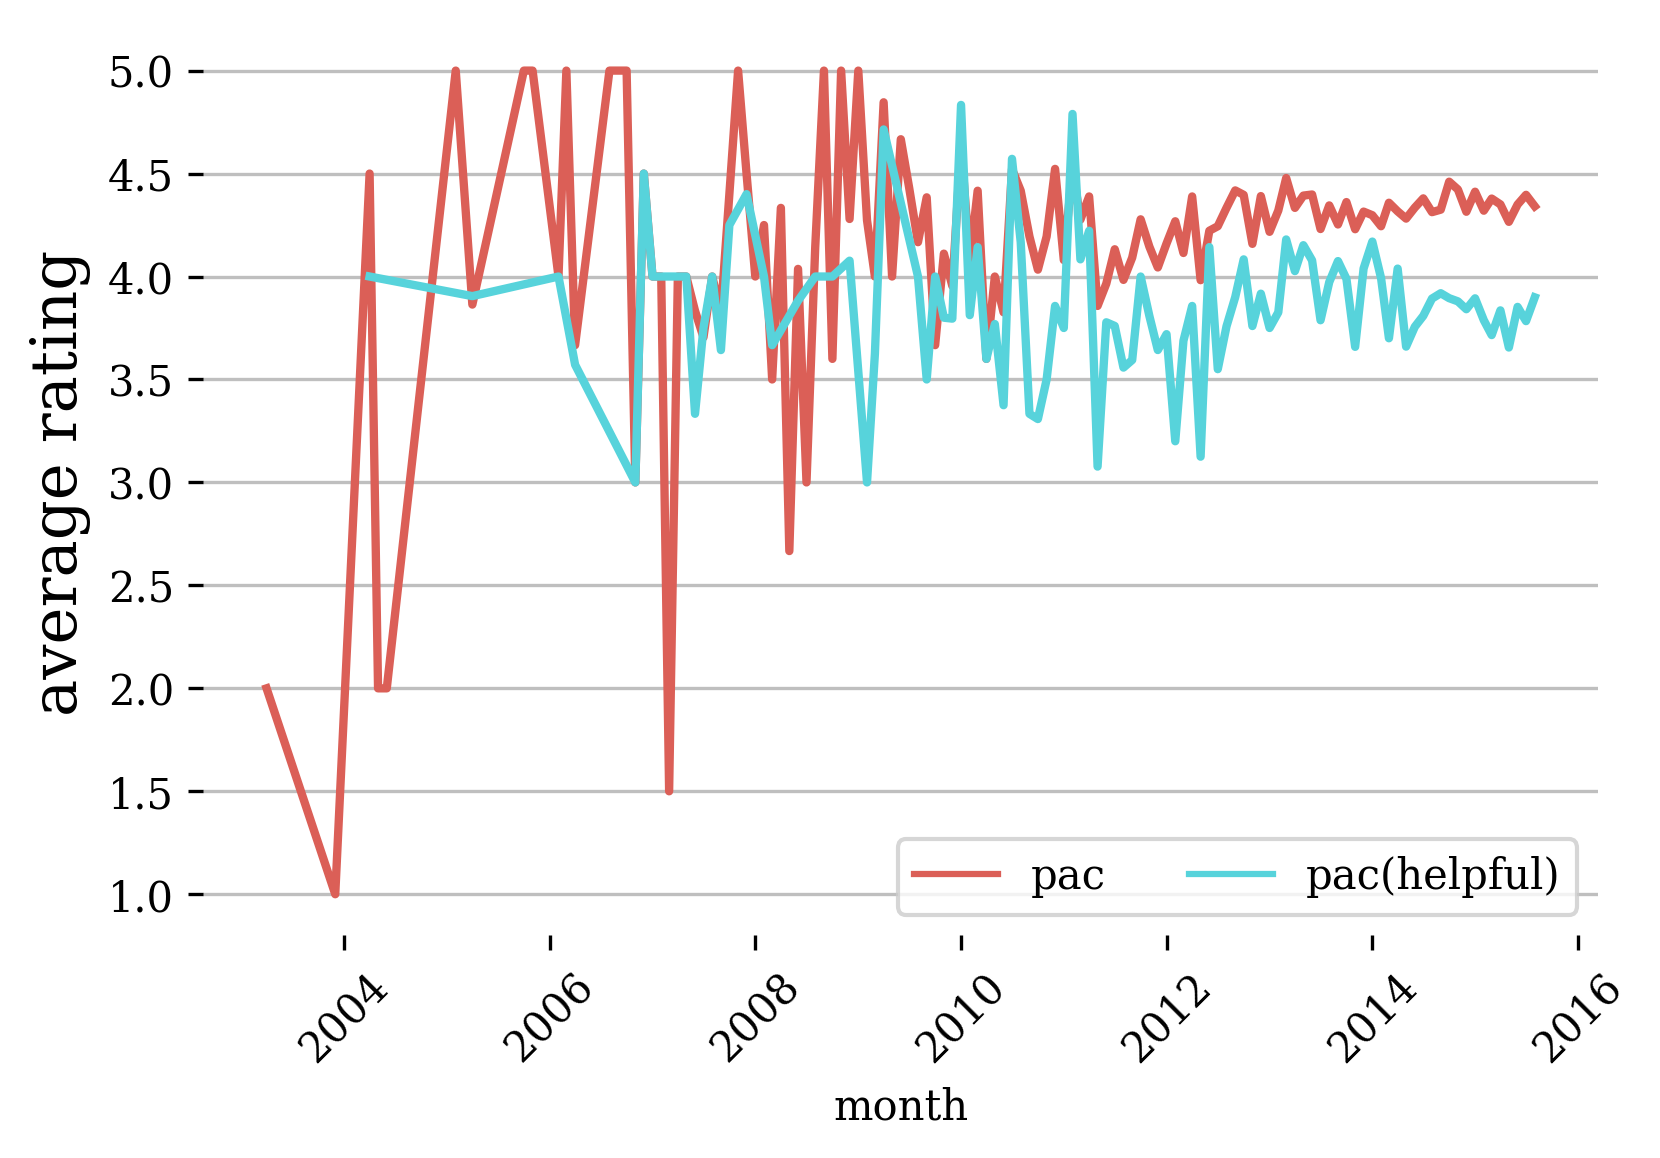

In [15]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
import os
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
os.chdir(r'C:\Users\90930\Desktop\美赛建模\2020年')
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from seaborn import color_palette

plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
font = {'family' : 'serif',   #将所有字体改变为粗体 serif
}
matplotlib.rc('font', **font)
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
#读取数据
hair = pd.read_csv("hair_dryer.tsv", sep="\t", )
microwave = pd.read_csv("microwave.tsv", sep="\t")
pac = pd.read_csv("pacifier.tsv", sep="\t")
print(hair.info()) #
print(hair.describe()) #
#赋予标志位
hair['flag']=1
pac['flag']=2
microwave['flag']=3




#%分别对三个图片进行画图
for total,name in zip([hair,microwave,pac],['hair','microwave','pac']):
    missingno.matrix(total)   #缺失值判断
    plt.show()
    total['review_date'] = pd.to_datetime(total['review_date'],format="%m/%d/%Y")  #也就是得到了date的时间
    total['Year'] = total['review_date'].dt.year #转换为1年
    total['month'] = total['review_date'].apply(lambda x:datetime.strptime(x.strftime('%Y-%m'),"%Y-%m")) #转换为年与月组合格式  ##得到总表
    color = color_palette("hls",2)  #表明蓝色色系
    total_group = total.groupby(['flag','month'])['star_rating'].mean().reset_index()
    total_group = total_group

    total_group_helpfuness = total[total['helpful_votes']>0].groupby(['flag','month'])['star_rating'].mean().reset_index()
    total_group_helpfuness = total_group_helpfuness[ (total_group_helpfuness['star_rating']>2) & (total_group_helpfuness['star_rating']<5)]
    ax=plt.gca()
    a=sns.lineplot(data=total_group,palette=color[0::2],x='month',y='star_rating',hue='flag',sizes=[0.1],legend='full',linewidth = 2)
    b=sns.lineplot(data=total_group_helpfuness,palette=color[1::2],x='month',y='star_rating',hue='flag',sizes=[0.1],legend='full',linewidth = 2)
    plt.ylabel('average rating',fontsize=15,)
    legend = ax.legend(ncol=3,frameon=True)
    legend_list = [name,name+"(helpful)"]
    for i in range(2):
        legend.texts[i].set_text(legend_list[i])

    ax.grid(axis='y', linestyle='-', alpha=0.8)  #画刻度尺
    plt.xticks(rotation=45,size=10) #旋转x轴标签
    sns.despine(left=True, bottom=True)  # 超级关键
    plt.show()


In [16]:
for total,name in zip([hair,microwave,pac],['hair','microwave','pac']):
    print(name+" the average length of helpful review:")
    total['review_length']=total['review_body'].apply(lambda x:len(str(x).split(' ')))
    #赞同的平均数
    review_length_mean_good = total[total['helpful_votes']>2].groupby(['star_rating'])['review_length'].mean()   #
    print(review_length_mean_good)
    #长度的平均数
    print(name+" the average length of total review:")
    review_length_mean = total.groupby(['star_rating'])['review_length'].mean()
    print(review_length_mean)

hair the average length of helpful review:
star_rating
1     97.732673
2    117.673077
3    127.821138
4    119.852941
5    119.425743
Name: review_length, dtype: float64
hair the average length of total review:
star_rating
1    70.437016
2    69.071987
3    66.457457
4    59.039122
5    49.318765
Name: review_length, dtype: float64
microwave the average length of helpful review:
star_rating
1    149.074713
2    160.904762
3    176.022222
4    137.134146
5    150.865772
Name: review_length, dtype: float64
microwave the average length of total review:
star_rating
1    112.927861
2    126.089286
3    105.552239
4     77.803333
5     64.071964
Name: review_length, dtype: float64
pac the average length of helpful review:
star_rating
1     95.871560
2    128.754717
3    122.666667
4    130.731429
5    120.296875
Name: review_length, dtype: float64
pac the average length of total review:
star_rating
1    59.303691
2    65.679365
3    59.380785
4    60.128130
5    44.254344
Name: review_lengt

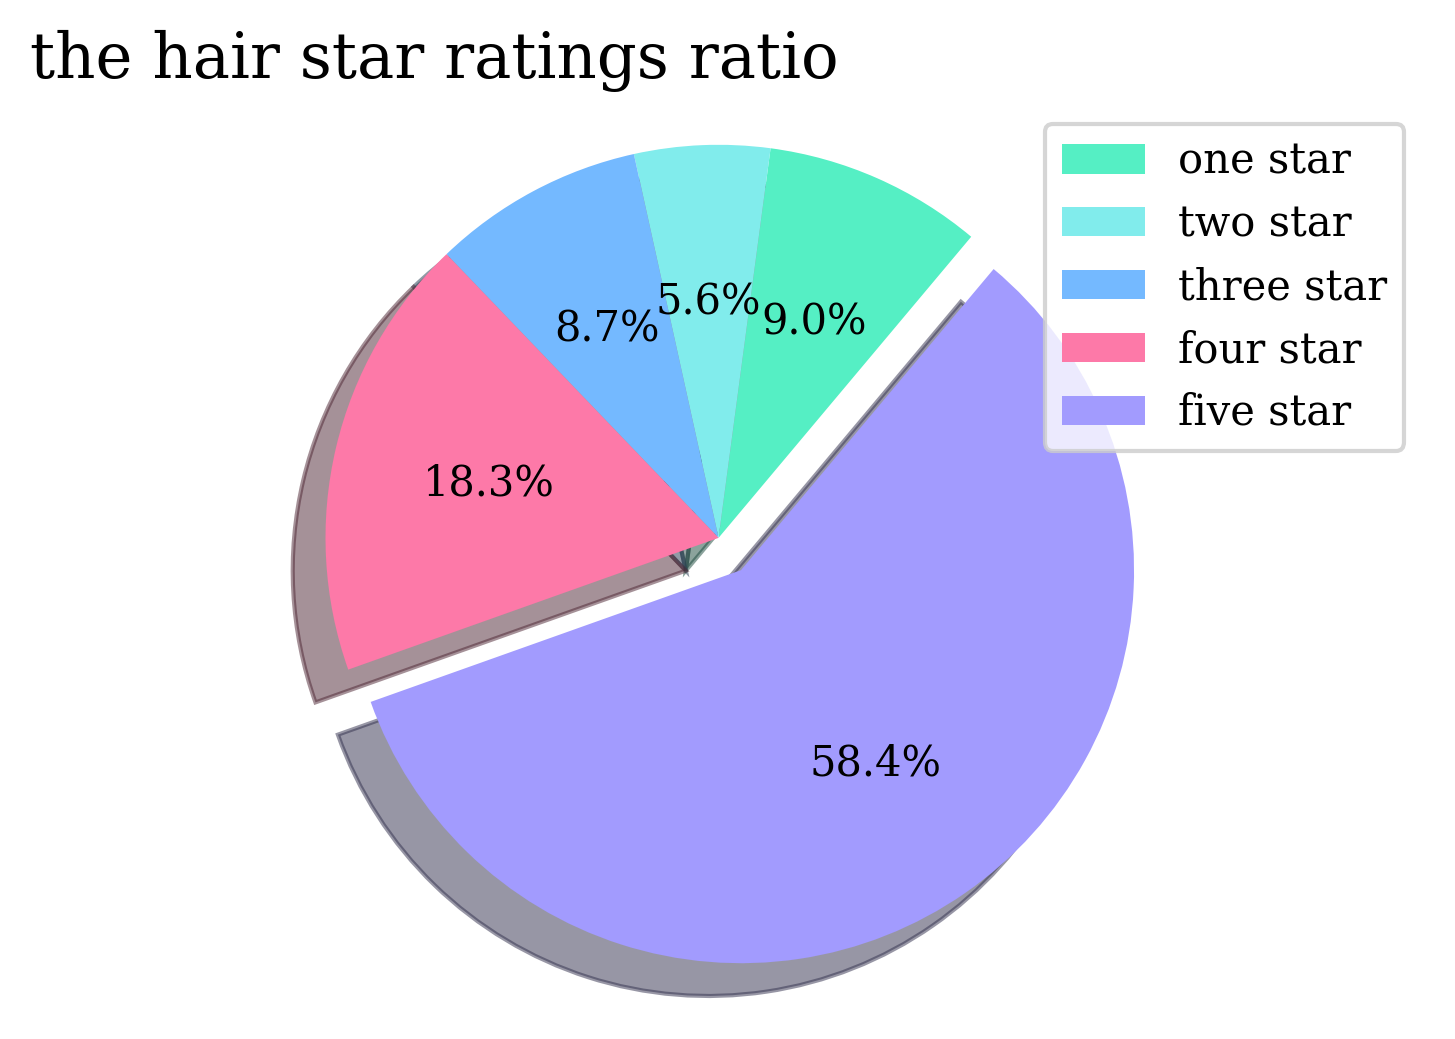

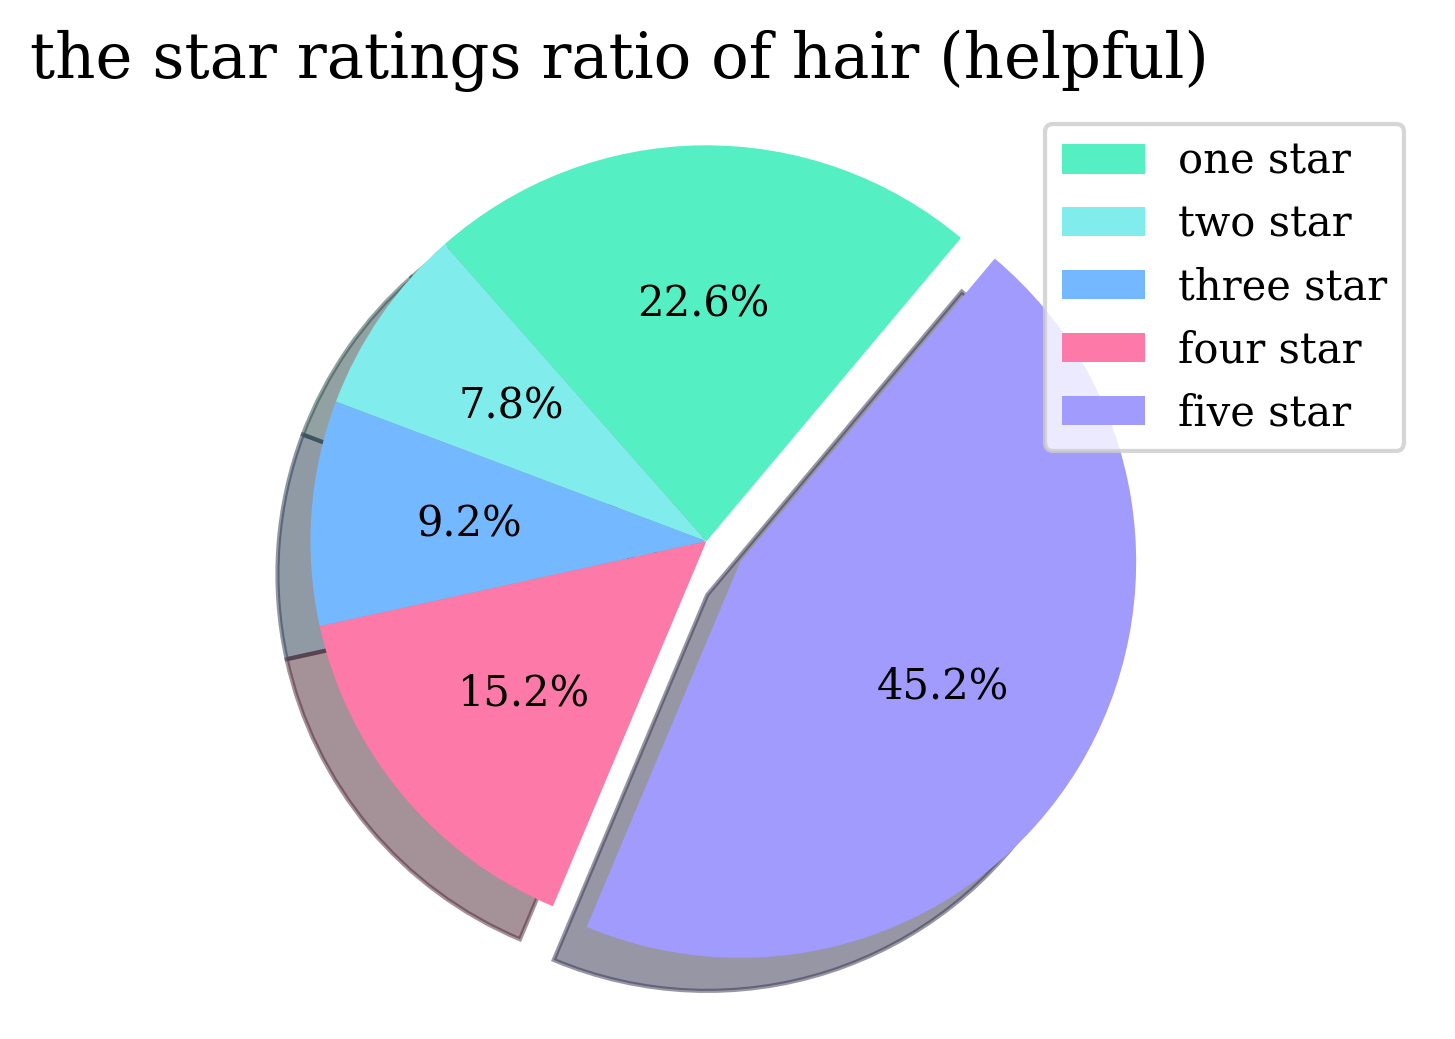

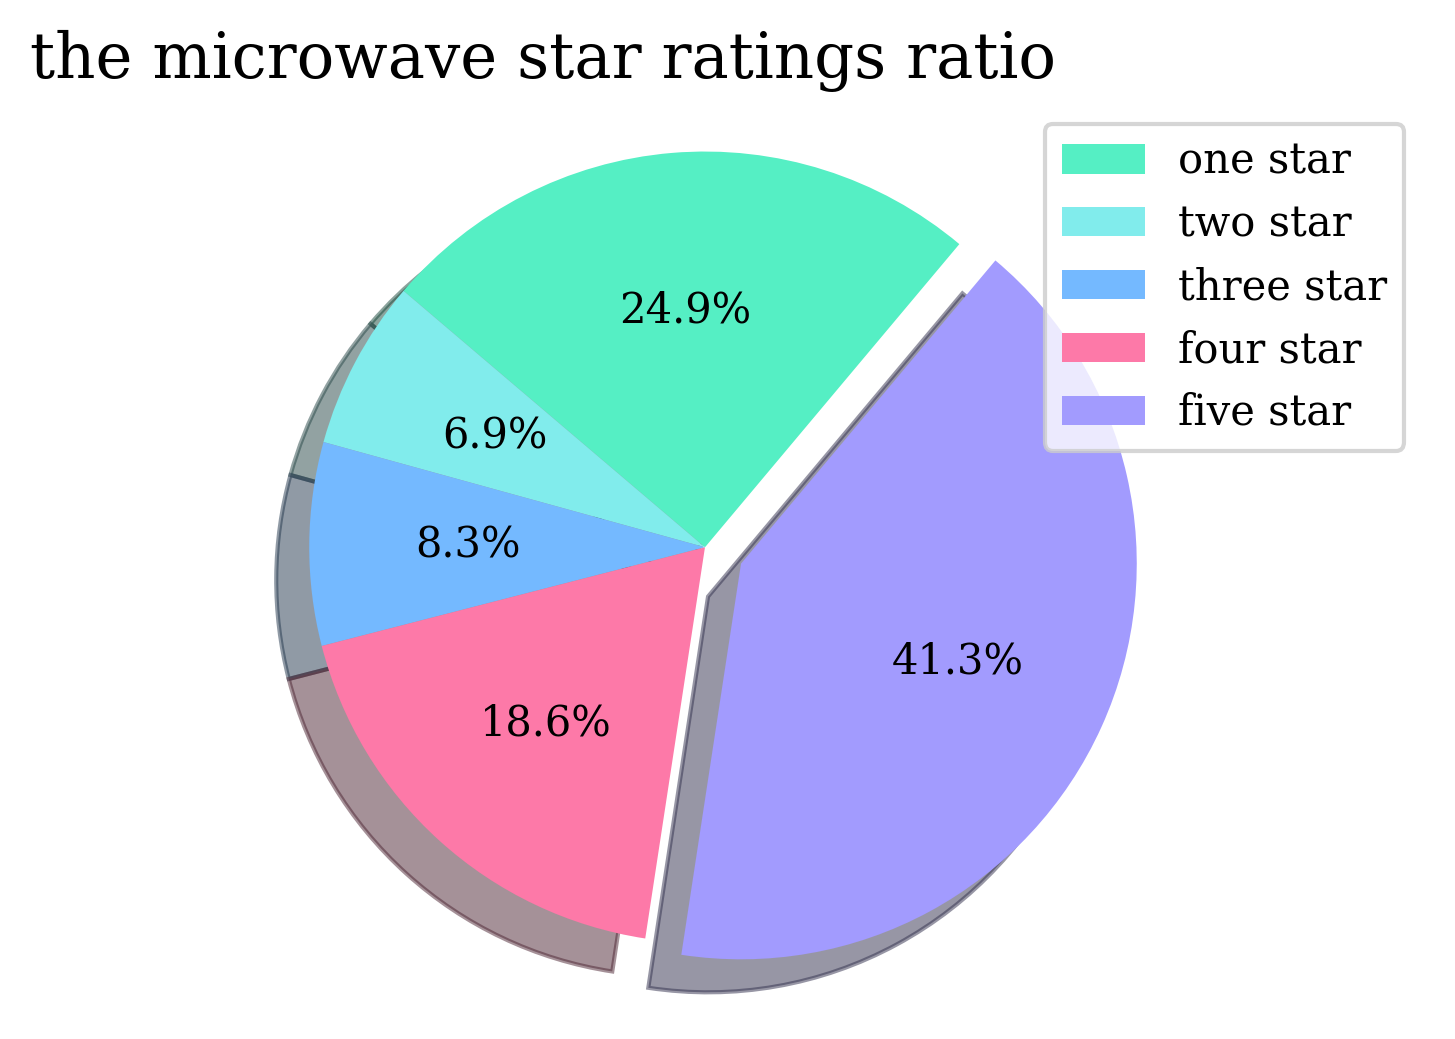

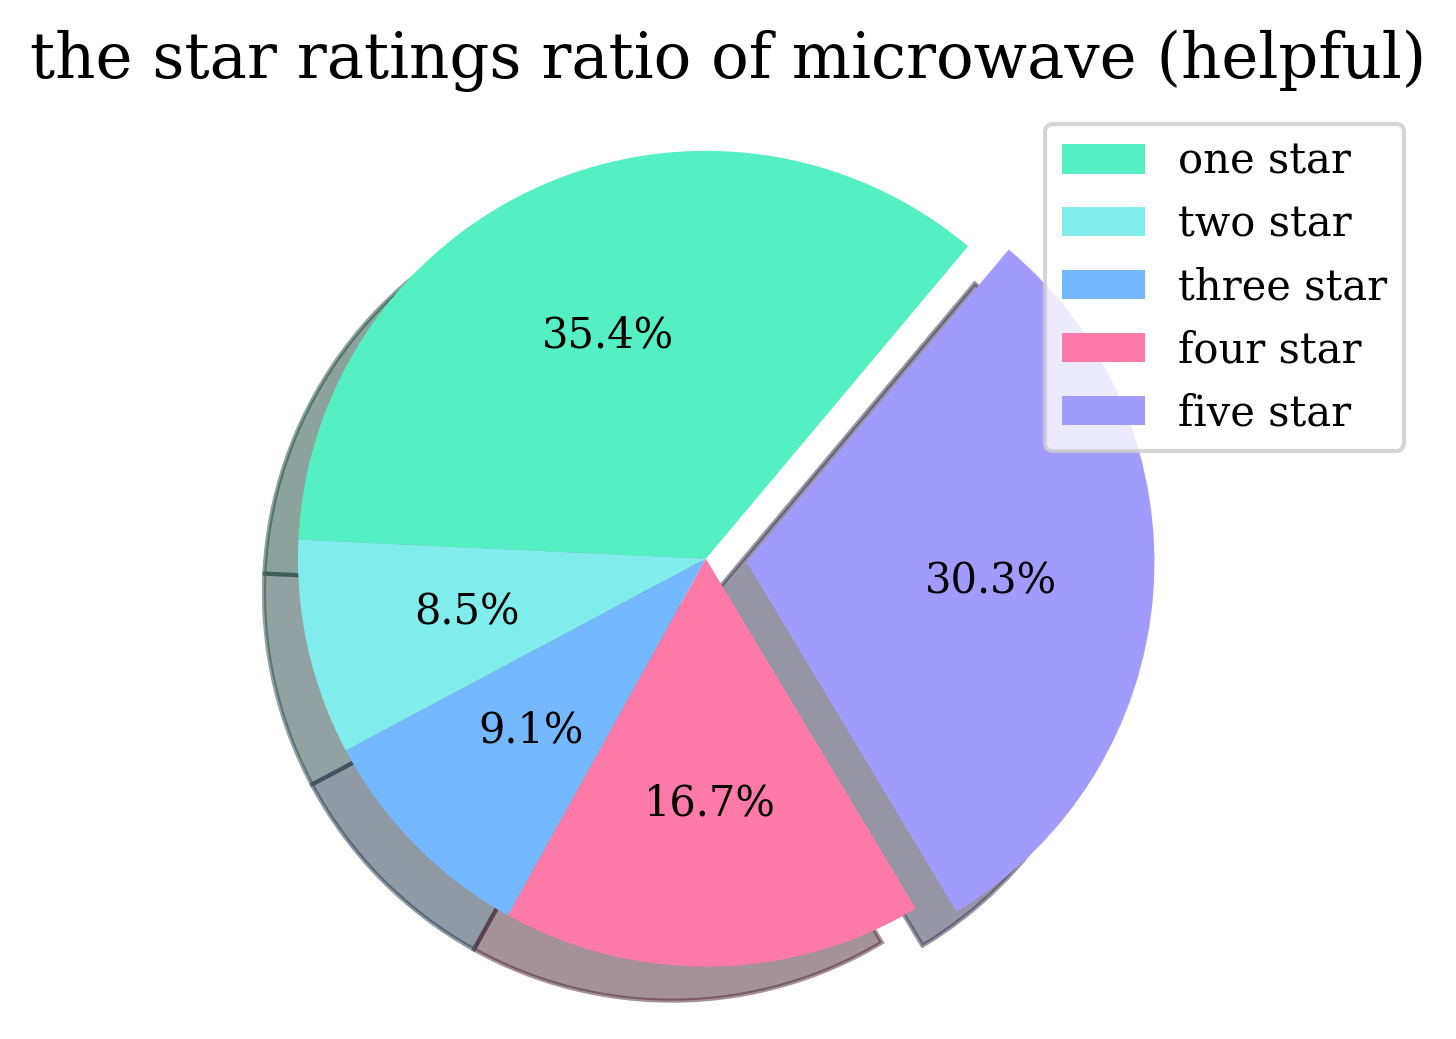

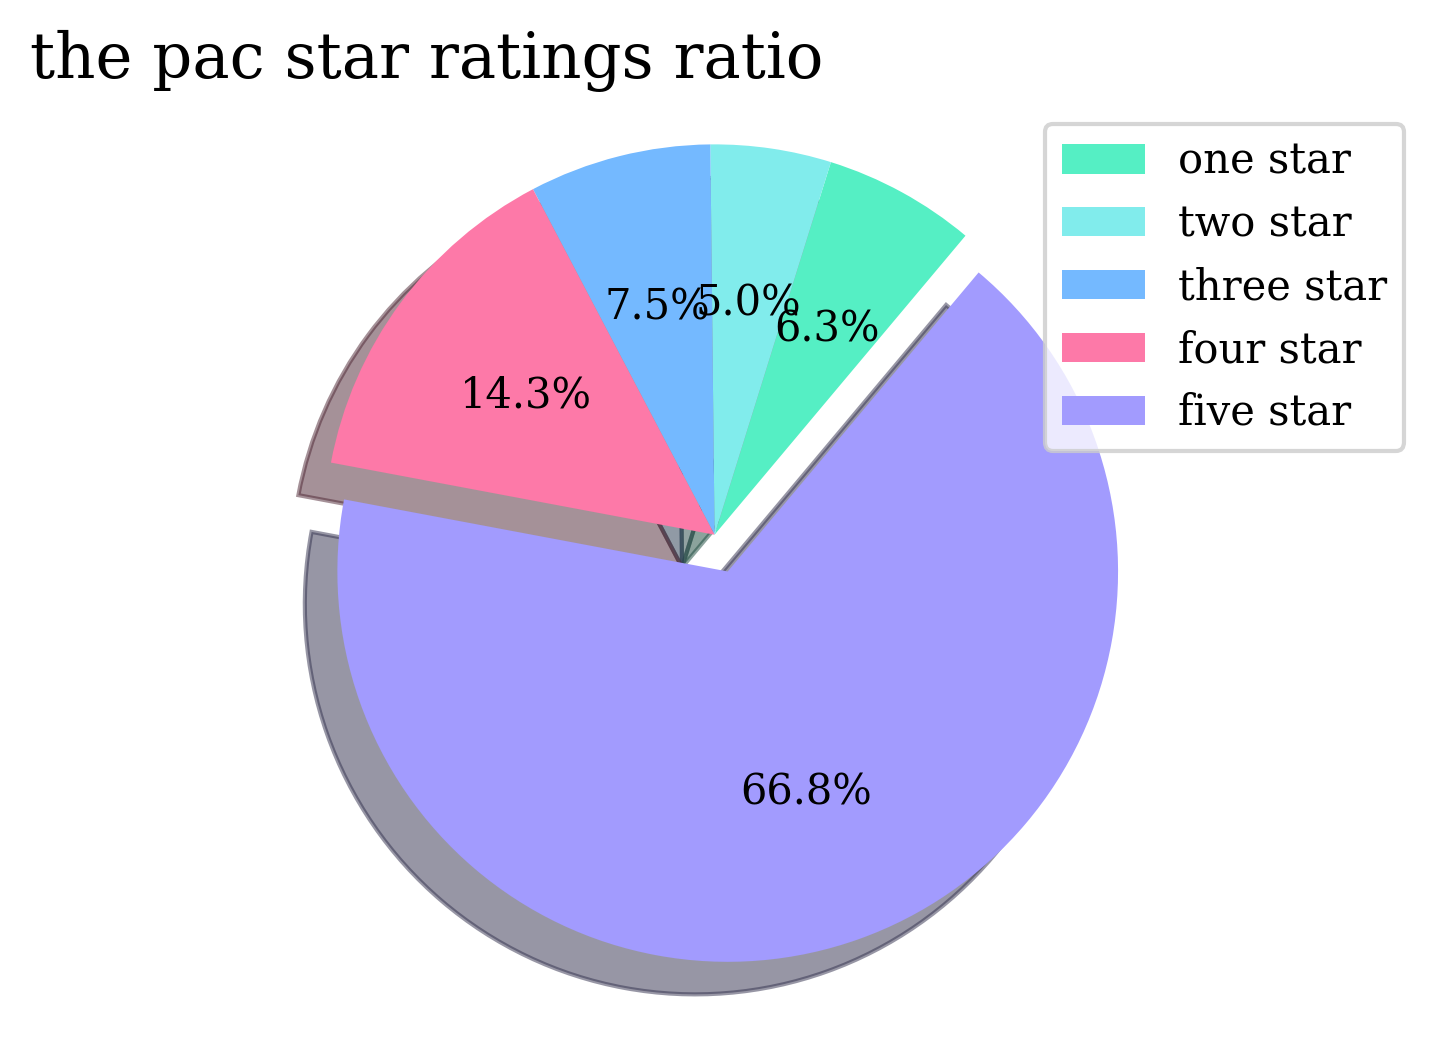

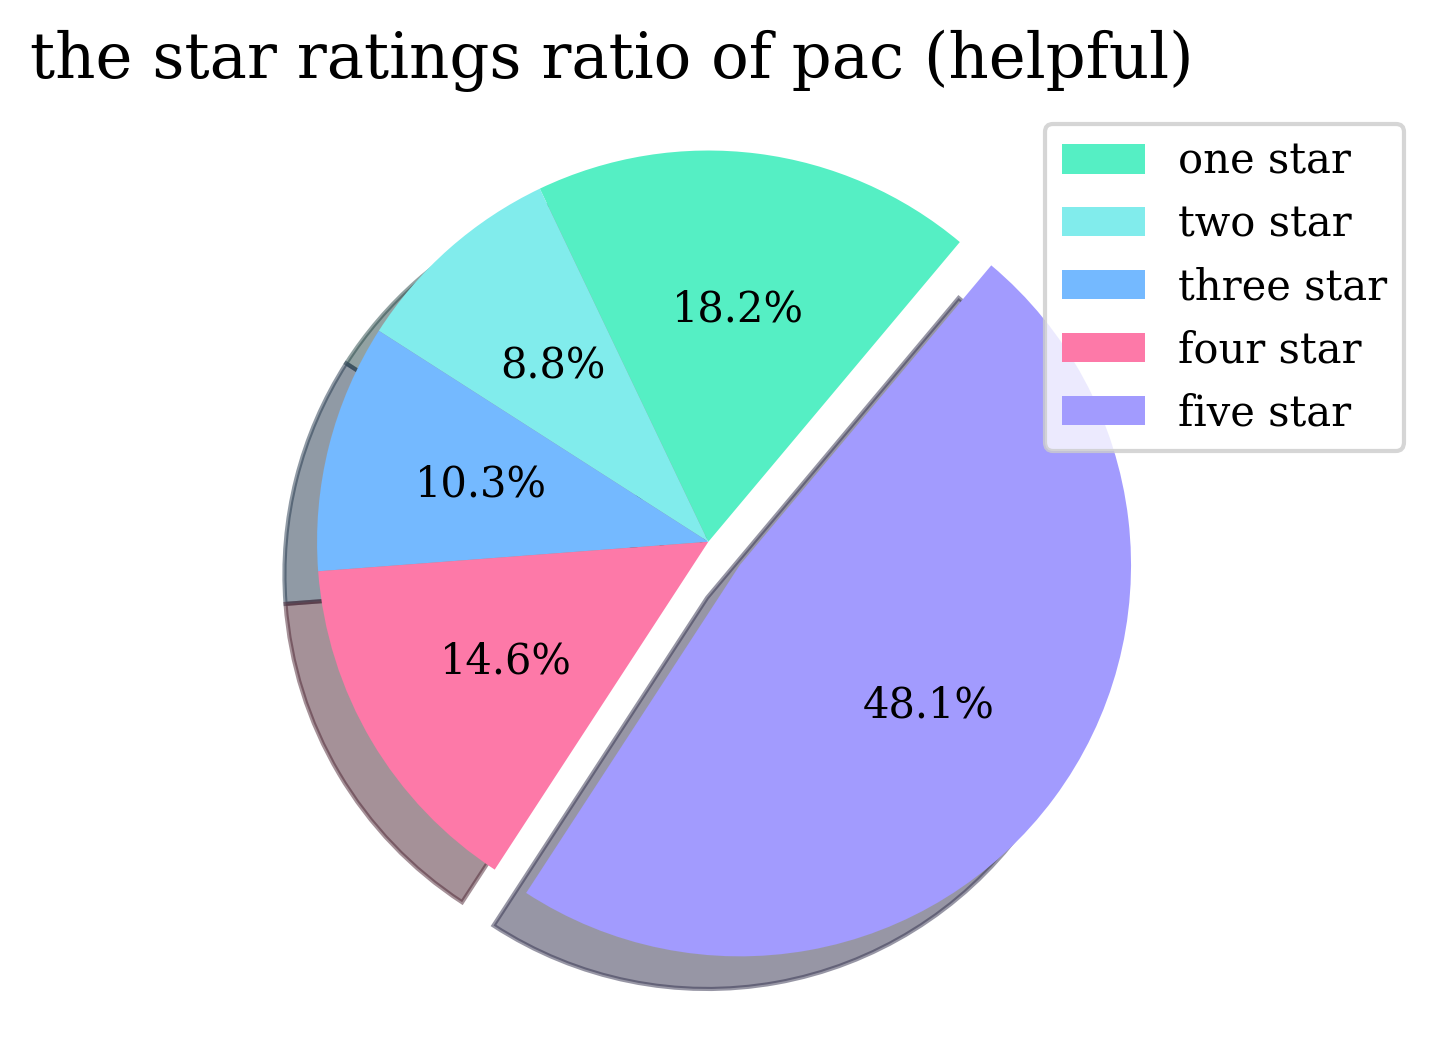

In [17]:
#total ratio
for total,name in zip([hair,microwave,pac],['hair','microwave','pac']):
    star_rating_ratio =  total.groupby(['star_rating'])['verified_purchase'].count()    #
    star_rating_ratio_good =  total[total['helpful_votes']>2].groupby(['star_rating'])['verified_purchase'].count()

    labels='one star','two star','three star','four star','five star'
    colors='#55efc4','#81ecec','#74b9ff','#fd79a8','#a29bfe'
    explode=0,0,0,0,0.1
    plt.pie(star_rating_ratio, colors=colors,explode=explode, autopct='%1.1f%%', shadow=True,startangle=50)
    plt.title("the "+name+" star ratings ratio",fontsize=15,loc='left')
    plt.legend(labels=labels,loc='upper right',)
    plt.axis('equal')
    plt.show()

#helpfulness_ratio
    labels='one star','two star','three star','four star','five star' #定义label值
    colors='#55efc4','#81ecec','#74b9ff','#fd79a8','#a29bfe'
    explode=0,0,0,0,0.1
    plt.pie(star_rating_ratio_good, colors=colors,explode=explode, autopct='%1.1f%%', shadow=True,startangle=50)
    plt.title("the star ratings ratio of "+name+" (helpful)",fontsize=15,loc='left')
    plt.legend(labels=labels,loc='upper right',)
    plt.axis('equal')
    plt.show()

0        9.793380
1       10.521544
2        5.241174
3        6.147135
4        5.726256
          ...    
2101    79.231344
2102    72.574992
2103    78.725166
2104    79.838151
2105    80.368772
Length: 2106, dtype: float64
0         7.092383
1        24.609647
2        23.030372
3        17.636105
4        15.497461
           ...    
1702    170.737684
1703    168.639858
1704    166.582023
1705    182.505705
1706    162.780144
Length: 1707, dtype: float64
0       0.291250
1       0.997174
2      -0.492417
3      -1.282481
4       0.190957
         ...    
700    13.518242
701     8.009381
702    13.920772
703    11.241664
704    13.077925
Length: 705, dtype: float64


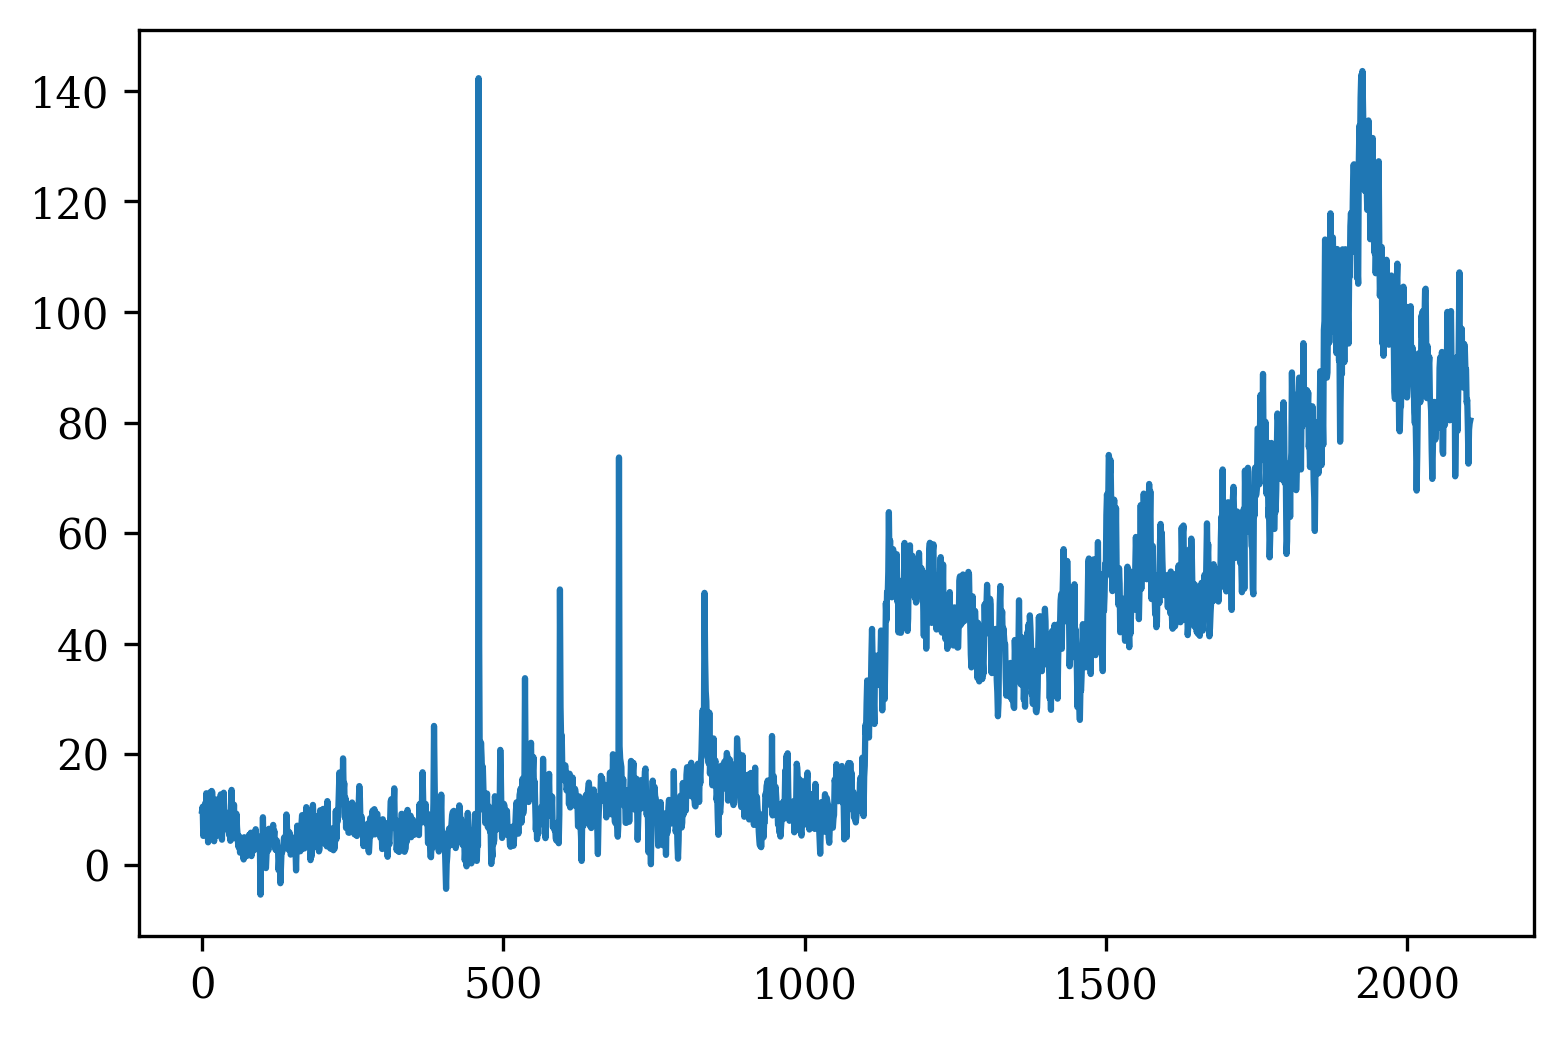

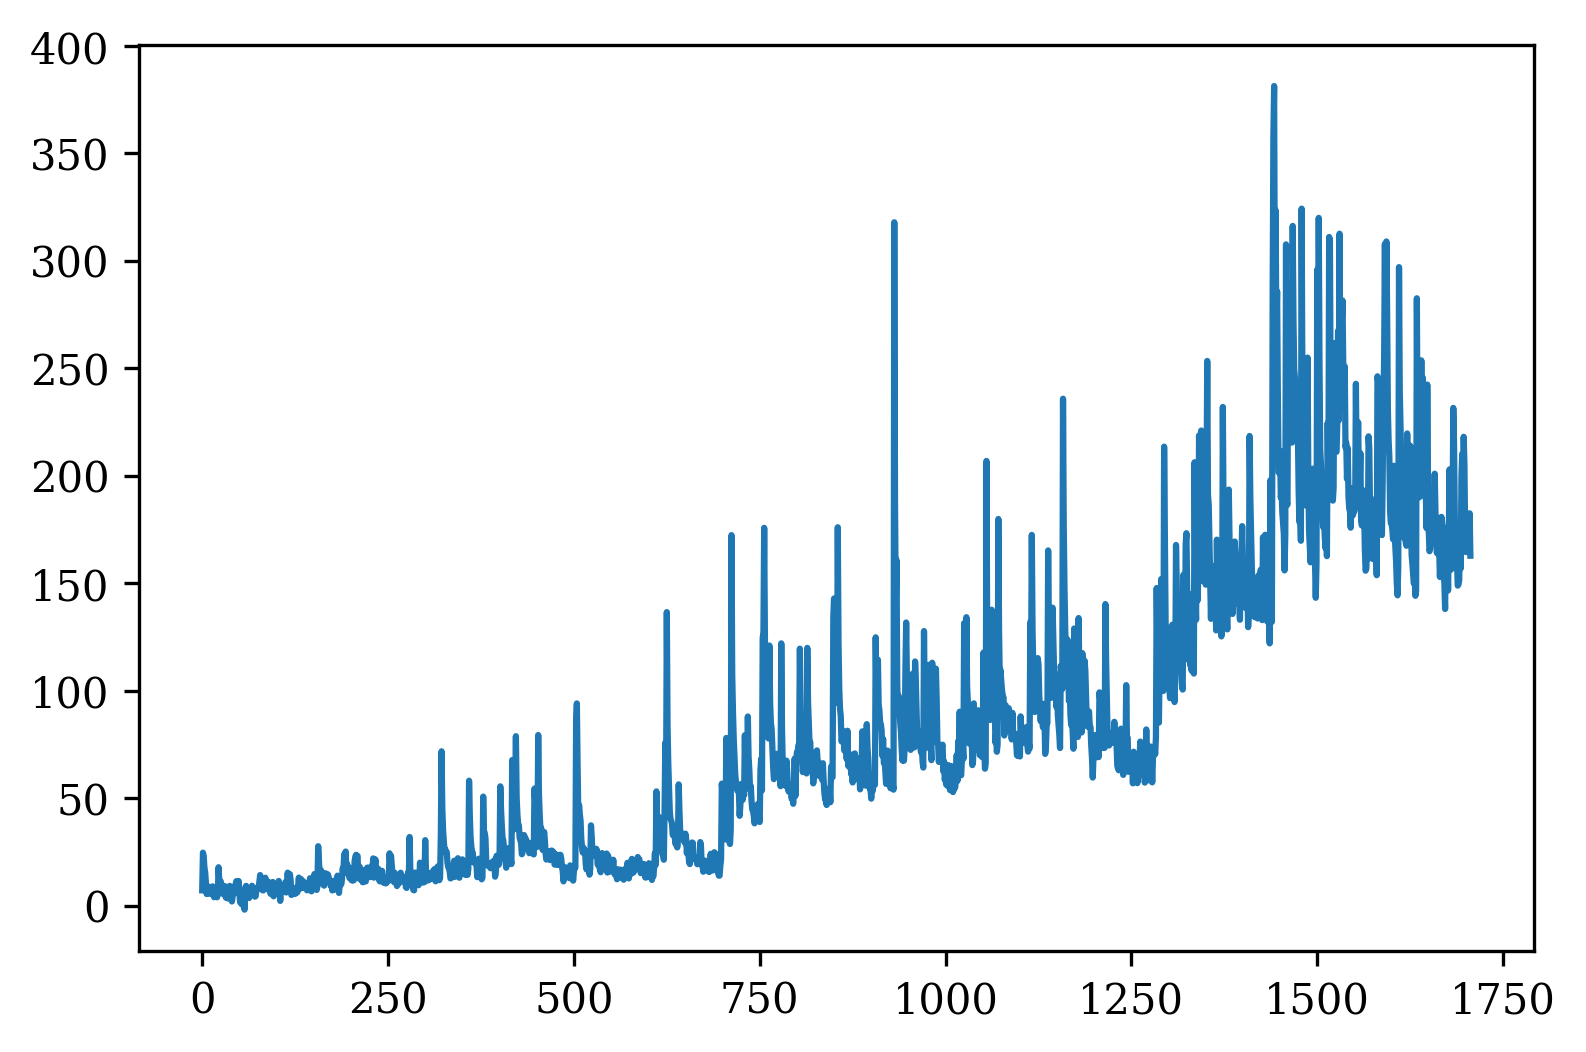

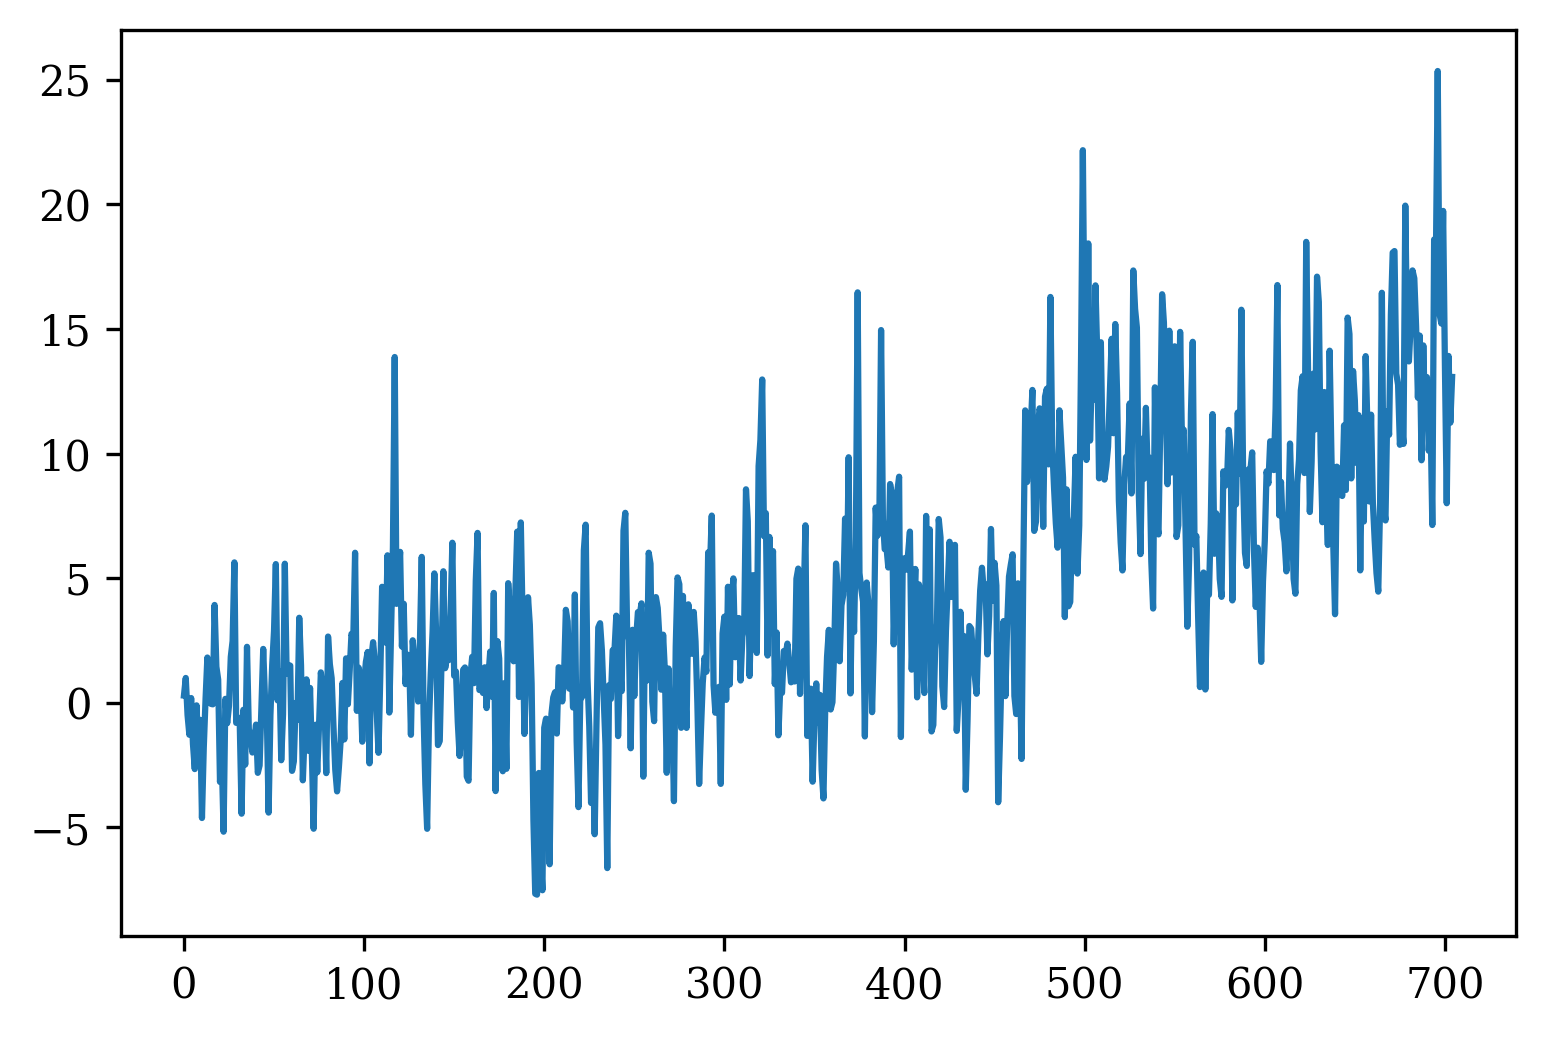

In [18]:
#计算当天weight有效值在helpgul中的比例
for total in [hair,pac,microwave]:
    #得到所有的个数
    #将数据转化为年-日的样子
    star_rating_group = total.groupby(['flag','review_date','star_rating'])['review_body'].count().reset_index()
    total['helpful_votes_sum'] = total.groupby(['review_date'])['helpful_votes'].transform("sum") #使用sum函数
    #得到helpful_votes的比例
    total['helpful_votes_ratio'] = total['helpful_votes'] / total['helpful_votes_sum']   #使用一些ratio获得
    #填充NAN值为1
    total['helpful_votes_ratio'] = total['helpful_votes_ratio'].fillna(0)
    #计算星级评分 [-2,2]
    total['rating_score'] = total['star_rating'].apply(lambda x:x-3)
    #计算声誉vine分数
    total['vine_score'] = total['star_rating'].apply(lambda x:1.2 if x =='Y' else 1)
    #求一天内声誉总和
    total['reputation_score'] = total.apply(lambda x:x['rating_score']*(1+x['helpful_votes_ratio'])*x['vine_score'],axis=1)
    #计算vine分数
    reputation_score_group = total.groupby('review_date')['reputation_score'].sum().reset_index() #也就是声誉总和的东西           #
    m=200
    list1=list()
    for i in range(m,reputation_score_group.index[-1]):
        sum1=0
        for j in range(i-199,i):
            time_set = reputation_score_group['review_date']
            score = reputation_score_group['reputation_score']
            day= (datetime.strptime(str(time_set[i])[0:10],"%Y-%m-%d") - datetime.strptime(str(time_set[j])[0:10],"%Y-%m-%d")).days
            sum1+=(1.0/day)*score[j]        #
        list1.append(sum1)
    result=pd.Series(list1)
    print(result)
    result.plot()
    plt.show()






In [19]:
    def timetimeseries_to_supervised(data,lag=1):
        df = pd.DataFrame(data)
        #create many columns
        colums = [data.shift(i) for i in range(1, lag+1)]  #
        colums = pd.DataFrame(colums).T
        df = pd.concat([colums,df], axis=1)
        return df

    X = result.values
    X = X.reshape(len(X), 1)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(X)
    scaled_X = scaler.transform(X)
    scaled_series = pd.Series(scaled_X[:, 0]) #transfrom to orginal
    train  = timetimeseries_to_supervised(scaled_series,1)
    train = train.fillna(0) #
    train = train.values
    # train = train.reshape(train.shape[0], train.shape[1])
    print(train.shape)
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = keras.Sequential()
    model.add(LSTM(50, batch_input_shape=(1, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    # for i in range(10):
    model.fit(X, y, epochs=1, batch_size=1, verbose=1, shuffle=False)
    y_pred = model.predict(X)
    print(y_pred.shape)
    print(y_pred)
    # model.reset_states()
    # inverted_X = scaler.inverse_transform(scaled_X)
    # inverted_series = Series(inverted_X[:, 0])
    # print(inverted_series.head())


(705, 2)
705/705 [==============================] - 2s 3ms/step - loss: 0.0455

InvalidArgumentError:  [_Derived_]  Invalid input_h shape: [1,1,50] [1,32,50]
	 [[{{node CudnnRNN}}]]
	 [[sequential_2/lstm_2/StatefulPartitionedCall]] [Op:__inference_predict_function_11124]

Function call stack:
predict_function -> predict_function -> predict_function
